# Exercise 1 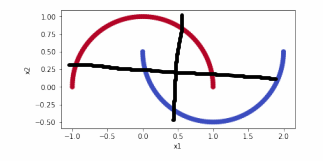

1. Scaling features so they don't have unit variance is important in ridge regression because we minimize the square of the coefficients. If one feature is MUCH larger in magnitude, the majority of gains will be made by minimizing that feature which unfairly penalize that feature.

2. We mean center the data in ridge regression to drop the intercept term from $\theta_0$ to $\theta$. This is because it makes the magnitudes of things more consistent and we don't have to account for offset. Also, geometrically, we can just then find the point where our Ridge Regression intersects with a contour of OLS, which would then be our estimate.

3. $\lambda$ should be chosen by the engineer, as it is a hyperparameter. Cross-validation should be used refine $\lambda$ to avoid overfitting or underfitting.

# Exercise 2

1. (a) PCA1 would point in the direction of x1, most likely with a slightly negative slope. PCA2 would be in the direction perpendicular, likely close to the direction of x2, but with an extremely positive slope.


1. (b) Linear PCA would not allow us to do this. We need to use some nonlinear method like Kernel PCA (rbf or polynomial likely both would work). Because the data isn't linearly seperable, we first need to project it into a higher dimensional feature space in order to project into one dimension.

2. The dimensionality of each principal component direction would be $n$, the same as the dimensionality of our data.

3. The vector is just each $x_i$ multiplied by $p_i$, like $x_1 * p_1$ all in a vector that represents the projection of the 3 dimensional $\hat x^{(i)}$ into the 3 principal component directions.

4. Mean center and scale our features, then we can express the matrix for m datapoints as $XP^T$ where $X$ is the design matrix, $P$ is a row vector of the principal components.

5. For our sample covairance matrix we have $S = \dfrac{1}{m}X^TX - \bar x \bar x^T$ which estimates the covariance between two features i and j.


Mean centered makes $\bar x = 0$

$S = \dfrac{1}{m}X^TX$

By SVD we have $X = UΣV^T$ so

$S = \dfrac{1}{m}(UΣV^T)^TUΣV^T$



$S = \dfrac{1}{m}VΣ^TU^TUΣV^T$



$S = \dfrac{1}{m}VΣ^2V^T$

V columns are eigenvectors, which are the principal component directions

# Exercise 3

1. We need to sample $(c+1)^n$ points. We are just extending our grid into $n$ dimensions.

2.

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

samples = np.random.uniform(0, 1, size=(101, 10))
pick = samples[0]
dist = np.linalg.norm(samples[1:] - pick, axis=1)
r = (np.max(dist) - np.min(dist))/np.min(dist)

print(r)

1.8044043466051682


3.

In [2]:
def get_r(n):
  samples = np.random.uniform(0, 1, size=(101, n))
  pick = samples[0]
  dist = np.linalg.norm(samples[1:] - pick, axis=1)
  r = (np.max(dist) - np.min(dist))/np.min(dist)

  return r

In [3]:
r_values = [get_r(i) for i in [1, 10, 100, 10**3, 10**4, 10**5]]

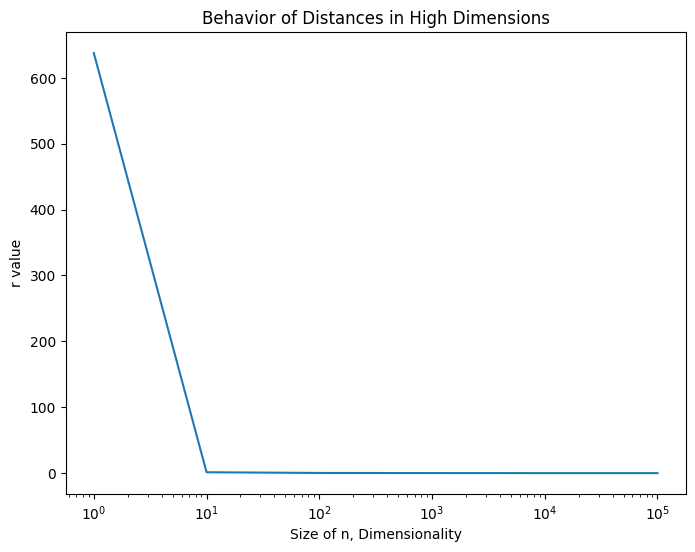

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot([1, 10, 100, 10**3, 10**4, 10**5], r_values)
plt.xscale('log')
plt.xlabel('Size of n, Dimensionality')
plt.ylabel('r value')
plt.title('Behavior of Distances in High Dimensions')
plt.show()

We are essentially seeing the distances between points going to incredibly large numbers. As the minimum distance increases, we approach zero r value as our minimum distance is huge. This means that as we add more dimensions, we naturally have larger and larger distances. (data gets sparser) For K-Means, which minimizes squared Euclidean distances, if we have some relatively uniform data we could end up viewing all data as being approximately the same distance from all other data. Essentially, by adding dimensions, we have now lost information about patterns that exist in the distances between data.   

4. To mitigate the effects of the curse of dimensionality, we can do dimensionality reduction

# Exercise 4

1.

In [13]:
import numpy as np
from PIL import Image
image = Image.open("Jonathan.jpg")
width = image.size[0]
length = image.size[1]
jonathancolor = np.array(image.getdata()) # color data for K-means
jonathan = jonathancolor.reshape(length, width, 3)

In [14]:
print(width*length)

1896100


Jonathan has 1,896,100 whole pixels in this picture!

2.

In [20]:
from sklearn.cluster import KMeans
kmeans4 = KMeans(n_clusters=4, random_state=42).fit(jonathancolor)
kmeans8 = KMeans(n_clusters=8, random_state=42).fit(jonathancolor)
kmeans16 = KMeans(n_clusters=16, random_state=42).fit(jonathancolor)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
cluster_centers_4 = kmeans4.cluster_centers_
cluster_centers_8 = kmeans8.cluster_centers_
cluster_centers_16 = kmeans16.cluster_centers_

In [109]:
cluster_centers_16

array([[110.18972131, 104.64306215, 113.23931761],
       [185.53881284, 195.41482456, 212.41099886],
       [ 88.30921743,  74.60811654,  80.47108349],
       [ 27.96475631,  28.33287989,  37.34292024],
       [164.03281464, 173.48833257, 188.69806727],
       [167.08745253,  45.4860416 ,  47.57405024],
       [243.88757078, 241.37690925, 243.0886361 ],
       [140.37014079, 132.94054045, 128.4284381 ],
       [ 59.41339804,  69.92651107,  97.57034902],
       [188.66275908, 185.22558694, 151.38031762],
       [112.42326996, 122.02214101, 150.44140581],
       [150.70021001, 153.03686582, 157.89793955],
       [ 77.27278045,  85.61463735, 112.32761319],
       [ 52.10314173,  49.23596063,  61.52731496],
       [211.72605026, 198.33140707, 187.1087737 ],
       [ 15.43206648,  15.21426109,  18.3792243 ]])

In [110]:
labels_4 = kmeans4.labels_
labels_8 = kmeans8.labels_
labels_16 = kmeans16.labels_

In [111]:
labels_16

array([8, 8, 8, ..., 9, 9, 9], dtype=int32)

In [113]:
decomp_4 = np.zeros(jonathancolor.shape)
decomp_8 = np.zeros(jonathancolor.shape)
decomp_16 = np.zeros(jonathancolor.shape)

In [115]:
for i in range(len(labels_4)):
  decomp_4[i] = cluster_centers_4[labels_4[i]]

for i in range(len(labels_8)):
  decomp_8[i] = cluster_centers_8[labels_8[i]]

for i in range(len(labels_16)):
  decomp_16[i] = cluster_centers_16[labels_16[i]]

In [116]:
decomp_4 = decomp_4.reshape(length, width, 3).astype(int)
decomp_8 = decomp_8.reshape(length, width, 3).astype(int)
decomp_16 = decomp_16.reshape(length, width, 3).astype(int)

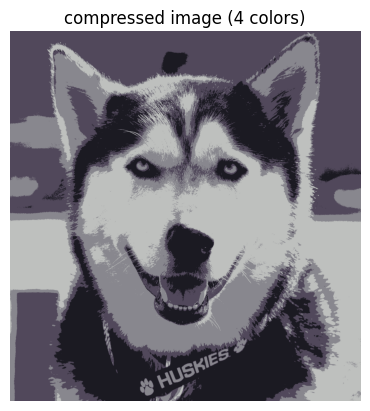

In [117]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('compressed image (4 colors)')
plt.imshow(decomp_4)

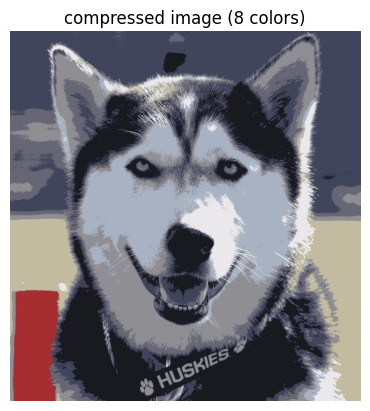

In [118]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('compressed image (8 colors)')
plt.imshow(decomp_8)

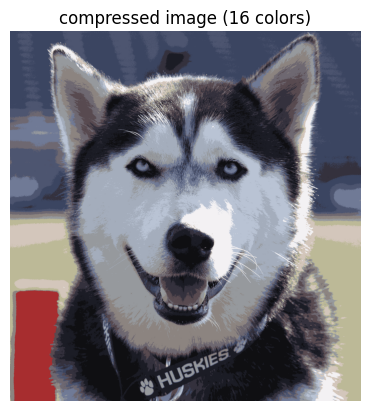

In [119]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('compressed image (16 colors)')
plt.imshow(decomp_16)

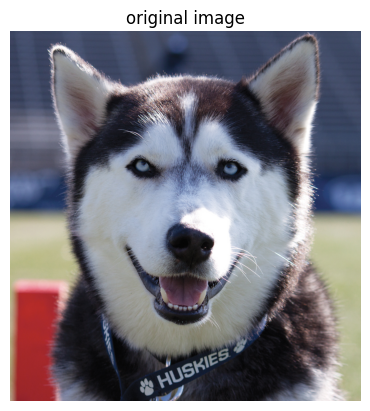

In [120]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('original image')
plt.imshow(jonathan)